<img src="logo-2020.png" alt="frankfurt school hmi" style="width: 160px;"/>

---
# Assignment 2.1 Logistic Regression  (14 points total)

## Instructions

The graded portion of Assignment 2 consists of one notebook:

    ps2_nb1-ml.ipynb

There is also an ungraded tutorial that is recommended:

    2-pandas_introduction.ipynb

As before, each notebook is designed for cells to be run sequentially.   

### Due Dates

- <b>Group M</b> 01.03.2019 before 23:59:59 (CET) <br>
- <b>Group D</b> 26.02.2019 before 23:59:59 (CET) 

NB: Machine Learning I is in Group D.

### Instructor
* Prof. Dr. Gregory Wheeler ([g.wheeler@fs.de](mailto:g.wheeler@fs.de))

---
### Declare your collaborators
You may work alone or in a group. The maximum group size is 4 people. 

If you work in a group, use the next cell to enter the list of names (first, last) of your collaborators. 
~~~python
# Example
COLLABORATORS = ['Stu Dent', 'May Bee', 'Ki Val Storr']
~~~
You should also familiarize yourself with the collaboration policy on the course Canvas page.

In [37]:
# Be sure your names are strings
COLLABORATORS = ['Gaurav Sharma']

# Logistic Regression with Two Features

Suppose your task is to predict the solvency of a firm based on two financial indicators: the firm's <i>return on equity</i> and the firm's <i>current ratio</i>.  <b>Return on Equity</b> (ROE) is a financial indicator which measures how much profit a firm generates with the equity invested by its shareholders. A positive value is good, whereas a negative value is bad. <b>Current ratio</b> is a liquidity measure that measures the firm's ability to pay near-term financial obligations.  A negative value may indicate that net working capital is negative, whereas positive values are good.

### Your Task

  - <b>Part A</b>: Your task is to build a logistic regression classification model that estimates the probability that a firm is <b>insolvent</b> ($y = 1$) or <b>solvent</b> ($y=0$) based on the features <b>ROE</b> and <b>Current Ratio</b>.  The (artificial) data set you are working with has unusually high variance in both ROE and current ratio, approximating what one might find for young technology firms or start ups. That said, don't get hung up on the cover story for this data set.  

* <b>Part B</b>: Use the Sklearn to build a logistic regression classifier to perform some analysis.

To begin, run the next cell to import libraries you will need. 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# PART A - Build a Logistic Regression Classifier

## I. Data preparation 

Start by inspecting the dataset `ps2_data-1.csv` in the data folder.  Notice that if you try to load this data as a numpy array, using for example
~~~python

data = np.loadtxt('ps2_data-1.csv', delimiter = ',')

~~~

you will see an error.  Why? 

In [39]:
data = pd.read_csv('ps2_data-1.csv', delimiter = ',')

If you inspect this file you will find that it has column names, which are strings, and numerical data.  So, numpy will complain that strings cannot be converted to numerical values.  The issue is that numpy arrays are tables of values, all of which must be the same data type.  What this error message is telling you, therefore, is that you are attempting to load a table with two different data types: in this case, strings and numbers. 

What should you do?  One option is to open up a text editor and remove the column names.  But removing these names would require you, rather than the machine, to keep track of the column labels.  That isn't a very good option, particularly when you haven't even inspected the data.  And trouble compounds with larger datasets.

Fortunately there is a Python package, called <b>pandas</b>, designed to work with this particular kind of "mixed-type" rectangular data structure.  Specifically, a <b>data frame</b> is a two-dimensional, labeled dataset. Data frames are ubiquitous, since most data includes labels of some kind to describe each feature (column) and, sometimes, each example (row).  A lot of financial data is in this format, too, particularly <b>time series</b> data.  The pandas library offers a very powerful toolkit for working with dataframes.  

A better solution to our problem  then is to load our `ps2_data-1.csv` into a pandas dataframe. The following line of code does this,

~~~python
df = pd.read_csv('ps2_data-1.csv')
~~~

where `df` is a common naming convention for variables storing dataframes. To inspect `df`, you may type `df.head(5)` to return the labels and first 5 examples:


<img src="ps2_fig01.png" alt="machine learning i" style="width: 210px;"/></br>


---

Now that we can see our data frame, we discover that it is not quite arranged the way we would like.  First, the column labels need to be changed to reflect the category of the taget variable and the correct names of the two features.  That is, you need to

~~~python
change: 'label' to 'Insolvency'
        'x1' to 'ROE'
        'x2' to 'Current_Ratio'
~~~

Note the underscore in the string 'Current_Ratio'. This is important to allow all key valuse to be indexed later.

The second change that is necessary is to move the target vector, the `Insolvency` column, to the end of the dataframe.  The result of these changes should be such that `df.head(5)` returns a dataframe that looks exactly like this:
      
<img src="ps2_fig02.png" alt="machine learning i" style="width: 250px;"/></br>

<b>Your task:</b>

In the next cell is a partially completed function, `config_df()`, within which you should include a few short lines of code to perform these changes. (By a few, I mean less than 6). When `config_df()` is called, the file `ps2_data-1.csv` is loaded and assigned to `df`. This dataframe is then changed according to the specifications above. When finished, a series of test cells will check that you've done this correctly. 

In [40]:
def config_df():
    """
        config_df() is a function to specifically load 
        and reconfigure the dataset for this assignment.
        
        The function takes no argument, but will load the
        data file and reconfigure it each time it is run.
        
        The output should be a pandas dataframe assigned to
        the variable 'df'
    """
    # load original dataset
    df = pd.read_csv('ps2_data-1.csv')
    # YOUR CODE HERE
    df = df.rename(columns={'label':'Insolvent', 'x1' : 'ROE','x2':'Current_Ratio'})
    df = df[['ROE','Current_Ratio','Insolvent']]
    #raise NotImplementedError()
    return df

In [41]:
# Public Test Cell
# call config_df()
df = config_df()
# Test whether 'Insolvent' heading was moved to the last column
assert df.columns[2] == 'Insolvent'
# Additional tests are hidden

### Dataframes and arrays
Some operations are easier on arrays, others on dataframes.  Therefore it can be helpful to pull the table values out of a dataframe and save them as a numpy array. Indeed, for this assignment, it may turn out to be a bit easier to work with arrays.  In any case, the point is to feel comfortable switching when <i>you</i> think it might be easier.   

This line

~~~python~~~
data = df.values
~~~
creates a numpy array.  Using this hint, complete the next function to extract a $(m \times n-1)$-features matrix `X` and a target vector `y` from an $n$-column dataframe.  Note that your function should work for data frames that have other than $(n -1) = 2$ features. 

In [42]:
def array_maker(df):
    """
       The function array_maker takes an n-column dataframe 
       df, with m rows, and returns:
        
         X, a (m x n-1) feature matrix
         y, a column vector
       
       You should assume that the dataframe is arranged where the last
       column is the target variable, y.
    """
    # YOUR CODE HERE
    
    df1 = df[['ROE','Current_Ratio']]
    df2 = df['Insolvent']
    X = df1.values
    y = df2.values
    #raise NotImplementedError()
    return X, y

In [43]:
# Public Test Cell
# call array_maker()
X, y = array_maker(df)
assert y[37] == 1.0

## II. Data Visualization

The following block of code produces a basic scatterplot with a legend that codes which firms in the data set are insolvent and which are solvent.

~~~python
mask = y.flatten() == 1
insolv = plt.scatter(X[mask][:,0], X[mask][:,1])
solv = plt.scatter(X[~mask][:,0], X[~mask][:,1])
plt.ylim(-7, 11) 
plt.xlabel('ROE')
plt.ylabel('Current_Ratio')
plt.legend((insolv, solv), ('Insolvent', 'Solvent'))
plt.show()
~~~

If you inspect `mask`, you will see that it is an np.array of [Booleans](https://docs.python.org/3/library/stdtypes.html), which is a data type we haven't used yet. What this line does is convert the 0s and 1s in the target vector `y` to `False` and `True`, respectively.  Then, `mask`, the stored array of the Boolean encodings of the class labels, is used as a key to find all of the insolvent ($y =1$) firms in our data set, and `~mask` (where `~` acts as logical negation and flips all the truth values in `mask`) is used to pick out all of the solvent firms.  `Legend` then takes the saved keys, `insolv` and `solv`, and associates with each the labels 'Insolvent' and 'Solvent'. The color scheme is chosen by default, but naturally you could control that, too.

The following block is reserved for you to run this code for you to inspect the data visually.


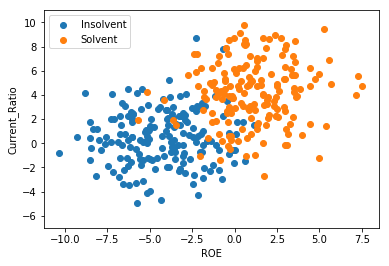

In [44]:
mask = y.flatten() == 1
insolv = plt.scatter(X[mask][:,0], X[mask][:,1])
solv = plt.scatter(X[~mask][:,0], X[~mask][:,1])
plt.ylim(-7, 11) 
plt.xlabel('ROE')
plt.ylabel('Current_Ratio')
plt.legend((insolv, solv), ('Insolvent', 'Solvent'))
plt.show()
#raise NotImplementedError()

## III. Building a Logistic Regression Model

We turn now to construct a logistic regression classifier.  One goal of this exercise is to draw attention to the differences between the hypothesis and cost function for logistic regression and the hypothesis and cost function of linear regression, yet to see that both learning algorithms follow the basic logic.  


###  Sigmoid Function

Recall that the <i>form</i> of the hypothesis $h_\theta(x)$ for logistic regression is

$$h_\theta(x) = g(\theta^Tx)$$
  
where the function $g$ is the <b>sigmoid function</b>:

$$g(z) = \frac{1}{1+e^{-z}}$$

Next, using the `np.exp()` function from numpy, implement the sigmoid function.

In [45]:
def sigmoid(z):
    """implementation of the sigmoid function,
    which takes input z, a positive or negative 
    real number, and returns a value between 
    0 and 1.
    
    Your one line of code should be of 
    the form:  gz = ---
    
    """
    # complete sigmoid with one line:
    #
    # gz = ----
    #
    # YOUR CODE HERE
    gz = 1 / (1 + np.exp(-z))
    #raise NotImplementedError()
    return gz

In [46]:
# Public Test 
assert sigmoid(0) == 0.5
assert round(sigmoid(.5),5) == 0.62246

In addition to the public test cell above, you might like to plot your sigmoid function.  Use the [numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) function to construct a sample `xx` of 100 evenly spaced numbers between -10 and 10 to feed to your sigmoid function. This can be done easily with the following few lines:

~~~python
xx = np.linspace(-10,10,100)
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.grid(True)
~~~

Constructing this plot is optional. But, it should look something like this:

<img src="ps2_fig03.png" alt="Scatter Plot" style="width: 400px;"/>

The color and style of your plot might be slightly different.   

## Question 1

Suppose you have trained a logistic regression classifier on data $X$ and it outputs on a new example $x$, which is not in your training data $X$, a prediction that $h_{\theta}(x) = 0.25$. 

Identify the true statement(s): 

<ul>
 <li>A) According to your classifier, $p(y = 0 \mid x, \theta) = 0.25$ </li>
 <li>B) According to your classifier, $p(y = 0 \mid x, \theta) = 0.75$  </li> 
 <li>C) According to your classifier, $p(x = 1 \mid y, \theta) = 0.25$</li>
 <li>D) According to your classifier, $p(x = 1 \mid y, \theta) = 0.75$</li>
 <li>E) None of the above are true</li>
</ul>
Complete the next function with a list recording your answer(s).

In [47]:
def ans_one():
    # # To answer, set the variable
    #
    # ans = ---
    #
    # to a LIST which is a sublist of
    # the possible answers: ['A', 'B', 'C', 'D', 'E'].
    #
    # YOUR CODE HERE
    ans = ['B']
    #raise NotImplementedError()
    return ans

In [48]:
# Test cell to check the format of your answer
ans = ans_one()
possible_ans = ['A', 'B', 'C', 'D', 'E']
if type(ans) == list and all(ii in possible_ans for ii in ans):
    assert True
else:
    raise AssertionError("Inadmissible answer. Check that your answer is the correct format.")

### Cost Function J$(\theta)$
The cost function for logistic regression is

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} \left(-y^{(i)} \log\left[h(x^{(i)}, \boldsymbol{\theta})\right] - (1- y^{(i)}) \log\left[1- h(x^{(i)}, \boldsymbol{\theta}) \right]\right)$$

which can be rewritten as

$$J(\theta) = - \frac{1}{m} \left(\sum_{i=1}^{m} y^{(i)} \log\left[  h(x^{(i)}, \boldsymbol{\theta}) \right] + (1- y^{(i)}) \log\left[1- h(x^{(i)}, \boldsymbol{\theta}) \right] \right)$$

The gradient of this cost function is a vector which is the same length $n$ as $\theta$, where the $j$th element (for $j = 0,1,2,\ldots,n)$ is

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i = 1}^{m} \left( h(x^{(i)}, \boldsymbol{\theta}) - y^{(i)}  \right) x^{(i)}_j$$
 

---

## Question 2

Compare logistic regression to linear regression. Identify the true statement(s).

<ul>
 <li>A) The gradients are identical and the hypotheses are the same. </li>
 <li>B) The gradients are identical and the hypotheses are not the same.  </li>
 <li>C) The gradients are not identical and the hypotheses are the same. </li>
 <li>D) The gradients are not identical and the hypotheses are not the same.</li>
 <li>E) There is insufficient information to answer. </li>
</ul>

Complete the next function with a list of your answer(s).

In [49]:
def ans_two():
   # # To answer, set the variable
    #
    # ans = ---
    #
    # to a LIST which is a sublist of
    # the possible answers: ['A', 'B', 'C', 'D', 'E'].
    #
    # YOUR CODE HERE
    ans = ['B']
    #raise NotImplementedError()
    return ans

In [50]:
# Test cell to check the format of your answer
ans = ans_two()
possible_ans = ['A', 'B', 'C', 'D', 'E']
if type(ans) == list and all(ii in possible_ans for ii in ans):
    assert True
else:
    raise AssertionError("Inadmissible answer. Check that your answer is the correct format.")

### Implementation

The next step is to implement the cost function and compute the gradient for logistic regression.  This implementation  will use `sigmoid()`, which you implemented above. 


There are four steps to implementing `costFunction()`: 

<ol>
    <li>Compute the hypothesis: $h(x; \boldsymbol{\theta}) = g(\theta^Tx)$ </li>
    <li>Compute the Cost Function: $J(\theta) = - \frac{1}{m} \left(\sum_{i=1}^{m} y^{(i)} \log\left[  h(x^{(i)}, \boldsymbol{\theta}) \right] + (1- y^{(i)}) \log\left[1- h(x^{(i)}, \boldsymbol{\theta}) \right] \right)$
    <li>Compute the gradients: $ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i = 1}^{m} \left( h(x^{(i)}, \boldsymbol{\theta}) - y^{(i)}  \right) x^{(i)}_j$
    <li> Using the implementations from parts 2 and 3, implement the final, executable cost function, `costFunction()`, which returns the cost, `J`, and gradiate, `grad`.
</ol>

The first function for you to complete, `computeJ()`, will require you to compute the hypothesis (step 1) and plug that value into the cost function (step 2) in order to return a value for $J$. With a working cost function, we can compute the gradient (step 3).  Then, with a working gradient function `computeGradient()`, implements the executable cost function, `costFunction()`, that we will pass to our optimization algorithm. 

---
Let's turn now to the implementation.

<div class="alert alert-block alert-info">
<b>Vectorize your code:</b> You will not receive full credit unless you vectorize your code. Specifically, you should not use any for loops or while statements.     
</div>

#### Step 1. Computing the cost function
The function `computeJ()` computes the cost function $J$ for a specific parameter vector $\boldsymbol{\theta}$. Recall from the matrix multiplication tutorial that `X @ theta` is equivalent to `np.dot(X, theta)`. This can allow for a fairly direct representation of the cost function using 

- `np.sum`
- `np.multiply`
- `np.log`
- `sigmoid`, which you defined above,
-  the variables `X`, `y`, `m`, and `theta`,
-  `-`, `+`, and `*`, 

and the normalizing term, $-\frac{1}{m}$.


In [51]:
def computeJ(theta, X, y):
    """
        computeCostFunction() computes the cost function
        J for logistic regression.
        
        You can complete this function with one line of code:
        
        J = ---
    """
    # number of training samples
    # DO NOT CHANGE
    m = len(y)  
    # YOUR CODE HERE  
    #J = np.sum(np.log(sigmoid(np.dot(X,theta)))*y + np.log(1-sigmoid(np.dot(X,theta)))*(1-y))*(-1/m)
    J = np.sum(np.log(sigmoid(np.dot(X,theta)))*y + np.log(1-sigmoid(np.dot(X,theta)))*(1-y))*(-1/m)
    #print(J)
    return J

In [52]:
# Public Test
theta_t = np.array([.02,.01])
assert round(computeJ(theta_t, X, y), 5) == 0.72982

#### Step 2. Compute the gradient
Now compute the gradient, using

- `X.T` (X transposed)
- `np.dot` or `@`
- `sigmoid`
- the variables `X`, `theta`, `y`, and `m`
- the operators `*` and `-`

and the normalizing term $\frac{1}{m}$.


In [53]:
def computeGradient(theta, X, y):
    """
        computeGradient() computes the gradient
        grad for logistic regression"""
    # number of training samples
    m = len(y)
    
    
    # YOUR CODE HERE
    grad = (1/m)*(np.dot(sigmoid(np.dot(X,theta))-y,X))
    #raise NotImplementedError()
    return grad

#### Step 3. Implement the executable cost function

The complete implementation of the cost function, `costFunction()`, is already written for you:

~~~python
def costFunction(theta, X, y):
    """Executable cost function"""
    # use cost function
    J = computeJ(theta, X, y)
    
    # use gradient function
    grad = computeGradient(theta, X, y)
    
    return J, grad
~~~

Run the next cell to make this function available.

In [54]:
def costFunction(theta, X, y):
    """Executable cost function"""
    # use cost function
    J = computeJ(theta, X, y)
    
    # use gradient function
    grad = computeGradient(theta, X, y)
    
    return J, grad

### Computing initial theta 

If you implemented `computeJ()` and `computeGradient()` correctly, then running the next block of code should return an initial cost, when theta is initialized to an array of zeros, of approximately $0.6931$, and the gradient vector at this initialized theta is a three element array, with approximate values of $[0.001 \ 1.318 \ 0.932 ]$.



In [55]:
## DO NOT EDIT
#
# setup the data matrix appropriately
m, n = X.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

# initalize theta
initial_theta = np.zeros(n+1)

# compute and display initial cost and gradient
J, grad = costFunction(initial_theta, X, y)

# print cost J at initialization
print('Cost at initial theta (zeros): {0}'.format(J))
# print gradiate at initialization
print('Gradient at inital theta (zeros): {0}'.format(grad))

Cost at initial theta (zeros): 0.6931471805599454
Gradient at inital theta (zeros): [0.00141643 1.31783649 0.93191404]


<div class="alert alert-block alert-info">
<b>Tip:</b> You will have touched stored variables several times by now, so if you have run cells out of order (which is not unusual) you may see unexpected values or even errors.  For example, the code block above adds a column of 1s to X. Running that cell more than once will keep adding columns of ones to your features matrix X, changing its dimension. A good rule of thumb, if you cannot see immediately what problem an error message is telling you, is to select <b>Cell >> All Outputs >> Clear </b> from the menu, then run all cells <b>once</b> in sequence from the beginning.   
</div>

In [56]:
# Tests of J and the three elements of grad
# approximate cost J with zeros initial_theta
assert round(J,4) == 0.6931
# approximate gradient grad with zeros initial_theta
#   grad[0]
assert round(grad[0],3) == 0.001 
#   grad[1]
assert round(grad[1],3) == 1.318
#   grad[2]
assert round(grad[2],3) == 0.932

## IV. Learning parameters

In <b>problem set 1 (ps1) </b> we implemented <b>batch gradient descent</b> to learn the optimal parameters $\boldsymbol{\theta} = (\theta_0, \theta_1)$ that minimized the cost function $J(\boldsymbol{\theta})$, yielding the best fitting linear model which minimized <b>mean-squared error</b> (MSE).  That exercise was intended to help further develop your intuitions about <i>how</i> computational optimization techniques are used to perform supervised learning, and how to change hyperparameters to get better performance.  

Instead of re-using your gradient descent algorithm, you instead will use a powerful built-in optimization algorithm called BFGS. The <b>Broyden–Fletcher–Goldfarb–Shanno</b> algorithm, or [BFGS algorithm](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), is a numerical optimization method for solving <i>non-linear</i> optimization problems.  (It won't matter that our classifier is a general linear model.)  


We will use the scipy implementation of BFGS from the [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) package, which will compute values for the parameter vector $\boldsymbol{\theta}$ that minimize the cost function $J$.  The block of code below imports `fin_bfgs` and saves to the output of the BFGS optimizer to `theta_opt`.

~~~python
from scipy.optimize import fmin_bfgs
theta_opt = fmin_bfgs(computeJ, initial_theta, fprime=computeGradient,
                maxiter=100, args=(X,y), disp=True)
~~~    
where:
- `computeJ` is the objective function to be minimized</li>
- `initial_theta` is the initialized parameter vector from part e)</li>
- `fprime=computeGradient` is the option to compute the gradient, using your computeGradient function </li>
- `maxiter=100` is the maximum number of iterations.</li>
- `args=(X,y)` supplies the features and target variable.</li>
- `disp=True` prints information about convergence and successful termination if true; otherwise, prints a warning message.

See the online [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_bfgs.html) page or the class lecture notes for more information.

Use the next cell to compute the optimized theta values `theta_opt`. If your cost function `computeJ` and gradient function `computeGradient` are implemented correctly, the BFGS algorithm should successfully terminate in approximately 15 iterations and print a value of approximately $0.210$.  This is the value of the objective function `computeJ()` parameterized by `theta_opt` with `X` and `y` as arguments.  Put differently, if your cost and gradient functions are implemented correctly, you should expect `computeJ(theta_opt, X, y)` $\approx 0.210$. 

In [57]:
# Compute optimal parameter vector 
# theta_opt using BFGS

from scipy.optimize import fmin_bfgs
theta_opt = fmin_bfgs(computeJ, initial_theta, fprime=computeGradient,
                maxiter=100, args=(X,y), disp=True)

#raise NotImplementedError()

Optimization terminated successfully.
         Current function value: 0.210453
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15


In [58]:
# Test of computeCostFunction(theta_new, X, y) using the opitimal 
# parameters theta_new
#
assert round(computeJ(theta_opt, X, y),5) == 0.21045

### Plot decision boundary

Above we produced a scatter plot of the data. That code can be slightly adapted to plot a decision boundary. The following two lines of code plots the decision boundary, which here is calculated with a default probability of 1/2.  This line of code

~~~python
plot_x = [-10, 8]
plot_y = -1/theta_opt[2]*(theta_opt[0] 
          + np.dot(theta_opt[1],plot_x))
~~~
where you might notice that nowhere does the data, `X`, figure <i>directly</i> in the computation of the decision boundary. It is a function of the parameter vector `theta_opt`.  Data is used to compute the parameter vector `theta_opt`, of course, but the data is not used to compute the decision boundary.  

<div class="alert alert-block alert-info">
<b>Hint:</b> The dimension of $X$ is now different from your first scatter plot above.   
</div>

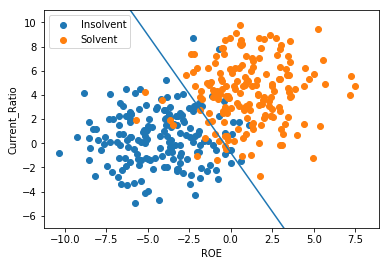

In [59]:
# Plot Decision Boundary
# YOUR CODE HERE

insolv = plt.scatter(X[mask][:,1], X[mask][:,2])
solv = plt.scatter(X[~mask][:,1], X[~mask][:,2])
plot_x = [-10, 8]
plot_y = -1/theta_opt[2]*(theta_opt[0] 
          + np.dot(theta_opt[1],plot_x))
plt.ylim(-7, 11) 
plt.xlabel('ROE')
plt.ylabel('Current_Ratio')
plt.legend((insolv, solv), ('Insolvent', 'Solvent'))
plt.plot(plot_x,plot_y)
#plt.plot(X,y)
plt.show()
#raise NotImplementedError()

## V. Using the model

Now suppose you wish to predict whether a particular firm which has an ROE of 0.0 and a current ratio of 0.0 is more likely or not to be insolvent. According to your model, what is the probability that it is insolvent?

Complete the following function to compute an answer.  Your one line of code should be of the form

~~~python
prob = ---(---(---, ---))
~~~

If implemented correctly, For ROE of 0.0, Current ratio of 0.0, and parameters `theta_opt` that you have already calculated using `fmin_bfgs` with respect to your features $X$ and correct labels $y$, the probability of insolvency for such a firm should be approximately $0.4$.

<div class="alert alert-block alert-info">
<b>Hint:</b> The function templates you have worked up until now have used the same variable names as global variables that you have been using, but this convention is about to change.  This convention was helpful to get us started to see how these various pieces are put together. But, unfortunately, this convention comes with a cost, since our functions are general: they do not and <b> should not hard-code variables </b> from outside the function call.  For example, <b>costFunction(theta, X, y)</b> takes as arguments three <b>variables</b>. In practice, you can call <b>costFunction(duck, Xman, why)</b>, where 'duck' is substituted inside the function for 'theta', 'Xman' for 'X', and 'why' for 'y'. Assuming these variables are of the right type, the algorithm will run.  A mistake that can happen is to hard code our X into a function, rather than using whatever is called in the X position.

This might not make sense until you run into an error. However, you may run into an error involving <b>theta</b> now that we have computed <b>theta_opt</b>.   
</div>

In [60]:
def probabilityInsolvent(score1, score2, theta):
    """
        probabilityInsolvent calculates the probability that a
        firm is insolvent based on two indicators:
        
          score1, which in our model is the ROE score;
          score2, which in our model is the Current Ratio;
        
        according to the logistic regression model parameterized by 
        
          theta, the fitted parameter vector
          
        and the features matrix X and labeled category vector y.
 
    """
    #construct a 1 x 2 array from score1 and score2
    #print(score1)
    #print(score2)
    scores = np.array([score1, score2])
    #C
    # add a 1 to the front of scores, yielding 
    # a 1 x 3 array
    scores = np.hstack((np.array([1]), scores))
    #print(scores)
    # calculate the probability (1 line)
    # prob = ---
    #
    # YOUR CODE HERE
    #print(np.dot(scores,theta))
    prob = sigmoid(np.dot(scores,theta))
    return prob

In [61]:
# Compute the student's probability of acceptance
probabilityInsolvent(0.0, 0.0, theta_opt)

0.3971584898269461

## VI. Evaluating the model
We can see from the plot of the decision boundary that our model is not completely accurate: there are some firms that we know are insolvent but which the model predicts are solvent and vice versa.  But how accurate is the model overall?

To answer this question, we first define a `predictionAccuracy` function to predict values of $y$ given the values computed for $h_\theta(x)$ by our logistic regression model.  This is done for you in the next cell.

In [62]:
# Evaluate the Accuracy of your Model
# DO NOT EDIT 
def predictAccuracy(X, y, theta):
    pred = [sigmoid(np.dot(X, theta)) >= 0.5]
    acc = np.mean(pred == y)   
    return acc

In [63]:
#theta_opt
predictAccuracy(X,y,theta_opt)

0.9178470254957507

Now apply `predictAccuracy` to get the accuracy of your optimized logistic regression model on the training data.  If implemented correctly, the training accuracy should be approximately $0.918$.

In [64]:
# Public Test
assert len(theta_opt) == 3

## VII. Changing the decision threshold

The decision boundary we plotted above and the probabilities that we calculated for insolvency ($y = 1$) where keyed to a probability <b>threshold</b> of 1/2.  Recall that this threshold corresponds to when $z = 0$ for `sigmoid(z)`, which yields the probability $p(y =1) = g(0) = \frac{1}{2}$. 

The next graph depicts a $g(z) = \frac{1}{2}$ threshold as a function of $z =0$, plotted in red. Recall that negative values of $z$ correspond to probability estimates that the negative ($ y = 0$) class is more likely than the than positive class $(y = 1$), positive values of $z$ correspond to estimates that the positive class ($y =1$) is more likely than the negative class ($y = 0$), and $z=0$, the corner case of even-odds that the class is positive or negative, is by convention included with the more-likely-than-not predictions that the class is positive ($y =1$).  



<img src="ps2_fig04a.png" alt="Scatter Plot" style="width: 300px;"/> 

Suppose we wish to have a higher probability of acceptance than 1/2, specifically $p(y =1) = 0.7$.  As a function of $z$, this would entail moving the threshold to the right:
<img src="ps2_fig04b.png" alt="Scatter Plot" style="width: 300px;"/>

Your task is to (i) plot a <b> new decision boundary</b> and (ii) find a threshold probability that <b>maximizes</b> the accuracy score computed by `np.mean(pred ==y)`, where `pred` predicts whether $y = 1$ or $y = 0$ depending on the the probability threshold for acceptance, which can range from 0 to 1.

### Step 1. New Decision Boundary
Use the next cell to compute and plot a new decision boundary where $p(y =1) = 0.7$ rather than $p(y = 0) = 0.5$. 

In [65]:
# YOUR CODE HERE
z = 0
gz = 1 / (1 + np.exp(-z + np.log(3/7)))
#print(gz)

### Step 2. New Predicted Probability of Insolvency

Our accuracy score is approximately $0.918$.  Can we get a higher accuracy score? This is the question we will explore next.

There are two functions to finish: (i) `newPredictAccuracy()` computes the accuracy of your model with a given threshold probability value specified by `threshold`; (ii) `maxAcc()` finds the threshold value or values which maximizes the accuracy score computed by `newPredictAccuracy()` and returns two variables: `acc`, which stores the highest accuracy score, and `thresh`, which stores the threshold value or values in an np.array for that highest score. 

To simplify computations and standardize answers, the <b>precision criterion</b> of tested threshold values is <b>two decimal places</b>.  For example, given the closed interval $[0.49, 0.51]$ the sequence of threshold values from you would use is $(0.49, 0.50, 0.51)$. No other number within $[0.49, 0.51]$ satisfies the precision criterion. 


In [66]:
## complete the function
def newPredictAccuracy(X, y, theta, threshold=0.5):
    # YOUR CODE HERE
    pred = [sigmoid(np.dot(X, theta)) >= threshold]
    acc = np.mean(pred == y)
    #raise NotImplementedError()
    return acc

In [67]:
## complete the function
def maxAcc(X,y,theta):
    # YOUR CODE HERE
    acc_list = []
    for i in np.arange (0.00, 1.00, 0.01):
        all_thresh = i
        test_acc = newPredictAccuracy(X, y, theta_opt, all_thresh)
        acc_list.append(test_acc)
        acc = max(acc_list)
        thres_list = [index for index, value in enumerate(acc_list) if value == acc]
        thresh = np.array([x / 100 for x in thres_list])
    
    # raise NotImplementedError()
    return ans, thresh

In [68]:
maxAcc(X,y,theta_opt)

(['B'], array([0.41, 0.42, 0.43]))

# PART B - SciKit-Learn Logistic Regression

Naturally, there are built-in libraries for logistic regression classification models.  In fact, it just takes a few lines of code once we import `LogisticRegression` from the `linear_model` methods in the `sklearn` (scikit-learn) library.

In [69]:
from sklearn.linear_model import LogisticRegression

Sklearn uses a common [API](https://en.wikipedia.org/wiki/Application_programming_interface) for building models. So, the sequence we follow to build a simple linear model resembles the sequence of steps for building a wide range of models.  It is good, therefore, to become aquainted with this tool.

Basically, there are two steps:

 - Instantiate a model
  
 - Fit the model

Followed by plotting and some rudimentary anlysis of the model. Later in the course we will add a third step, which involves making predictions and evaluating the accuracy of those predictions.

---
## Question 3

To answer the next question, you should use a [Sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and methods. It is necessary to use the following (and only the following) parameter settings:

~~~python
model = LogisticRegression(random_state=21)

~~~

There are four quantities that you will need to report about your Logistic regression model: 

 - a) The predicted probability that $y=0$ for the first observation in the training set, rounded to 3 decimal places.
 - b) The predicted class label of the last observation in the training set.
 - c) True or False: the predicted class label of the last observation in the training set is  correct.  


Complete the next function to record your answer(s). Pay attention to data types.

---

In [70]:
def ans_three():
    """ Returns four numerical values of your linear model.  
    
    Parameters
    ----------
    :a:  float
        The predicted probability of the first training example, rounded to 3 decimal places.
    :b:  float
        The predicted class label of the last observation in the taining set
    :c:  Boolean
        The truth value of the assertion that the predicted label of the last observation is correct.
    
    Returns
    -------
    :a:
    :b:
    :c:
    """
 
    # YOUR CODE HERE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=21).fit(X, y)
    a = model.predict_proba(X[:1, :])[0][0]
    b = model.predict(X[-1:,:])[0]
    c = (b == y[-1])
    #raise NotImplementedError()
    return a, b, c # do not edit

In [71]:
ans_three()

(0.6206700436260497, 1, False)

In [ ]:
# Test for Collaborator policy before submission
%run -i 'collaboration_test.py'

Before turning this notebook in, you should do the following steps:
  
  1. __Restart Kernel__ (Kernel ⟶ Restart and Clear Output)
  2. __Run all Cells__ (Cell ⟶ Run All)
  3. __Validate__: Press the 'Validate' button
  4. __Save File__ (File ⟶ Save and Checkpoint)
  5. __Close and Shutdown Kernel__ (File ⟶ Close and Halt)